In [10]:
import sys
from os import path
sys.path.append(path.join(path.dirname(path.abspath("__file__")), '..'))

import matplotlib.pyplot as pl

import config as ac
q = 1.602176e-19 #C
meV2J=1e-3*q #meV to Joules

# Input File(s)
# -------------
ac.inputfilename = "sample-qw-barrierdope"

# Shooting method parameters for Schrödinger Equation solution
ac.delta_E = 0.5*meV2J #Energy step (Joules) for initial search. Initial delta_E is 1 meV. 
ac.d_E = 1e-5*meV2J #Energy step (Joules) within Newton-Raphson method when improving the precision of the energy of a found level.
ac.E_start = 0.0    #Energy to start shooting method from (if E_start = 0.0 uses minimum of energy of bandstructure)
ac.Estate_convergence_test = 1e-9*meV2J
# FermiDirac
ac.FD_d_E = 1e-9 #Initial and minimum Energy step (meV) for derivative calculation for Newton-Raphson method to find E_F
ac.FD_convergence_test = 1e-6 #meV
ac.np_d_E = 1.0 # Energy step (meV) for dispersion calculations
# Poisson Loop
ac.damping = 0.5    #averaging factor between iterations to smooth convergence.
ac.max_iterations=80 #maximum number of iterations.
ac.convergence_test=1e-6 #convergence is reached when the ground state energy (meV) is stable to within this number between iterations.

# Output Files
# ------------

notebook_name = "x_sweep"
# filename_without_extension = path.splitext(path.basename("tutoria1_sef_consistent_debugging.ipynb"))[0]

ac.output_directory = notebook_name
ac.parameters = True
ac.electricfield_out = True
ac.potential_out = True
ac.sigma_out = True
ac.probability_out = True
ac.states_out = True

# Result Viewer
# -------------
ac.resultviewer = True
ac.wavefunction_scalefactor = 200 # scales wavefunctions when plotting QW diagrams
# Messages
# --------
ac.messagesoff = False
ac.logfile = 'aestimo.log'

#Here, we will alter the default settings of the config.py file for the purposes of this tutorial
ac.use_cython = False
# ac.messagesoff = True

In [ ]:
class Structure(object): pass
s = Structure() # this will be our datastructure

# TEMPERATURE
s.T = 3.0 #Kelvin

# COMPUTATIONAL SCHEME
# 0: Schrodinger
# 1: Schrodinger + nonparabolicity
# 2: Schrodinger-Poisson
# 3: Schrodinger-Poisson with nonparabolicity
# 4: Schrodinger-Exchange interaction
# 5: Schrodinger-Poisson + Exchange interaction
# 6: Schrodinger-Poisson + Exchange interaction with nonparabolicity
s.computation_scheme =3

# Non-parabolic effective mass function
# 0: no energy dependence
# 1: Nelson's effective 2-band model
# 2: k.p model from Vurgaftman's 2001 paper
s.meff_method = 2

# Non-parabolic Dispersion Calculations for Fermi-Dirac
s.fermi_np_scheme = True #needed only for aestimo_numpy2.py

# QUANTUM
# Total subband number to be calculated for electrons
s.subnumber_e = 2
# Total subband number to be calculated for electrons (needed only for aestimo_numpy_h)
s.subnumber_h = 1 

# APPLIED ELECTRIC FIELD
s.Fapplied = 0.00/50e-9 # (V/m)

# --------------------------------
# REGIONAL SETTINGS FOR SIMULATION
# --------------------------------

# GRID
# For 1D, z-axis is choosen
s.gridfactor = 0.01 #nm
s.maxgridpoints = 200000 #for controlling the size

dopant = 5.0e18 #cm^-3, doping concentration
well_l = 16.0
x_frac = 0.3
s.material =[[ 1.0, 'AlGaAs', x_frac, dopant, 'n'],
            [ 4.0, 'AlGaAs', x_frac, 0.0, 'n'],
            [ well_l, 'GaAs', 0, 0, 'n'],
            [ 4.0, 'AlGaAs', x_frac, 0.0, 'n'],
            [ 1.0, 'AlGaAs', x_frac, dopant, 'n']]

well_layer = 2

In [12]:
def plot_QW_view(result,title):
    fig2 = pl.figure()
    pl.suptitle(title)
    pl.subplot(1, 1, 1)
    pl.plot(result.xaxis*1e9, result.fitot/meV2J, "k",label="Potential")
    for level, state in zip(result.E_state, result.wfe):
        pl.axhline(level, 0.1, 0.9, color="g", ls="--")
        pl.plot(result.xaxis*1e9, state * ac.wavefunction_scalefactor + level, "b")
        # pl.plot(xaxis, state**2*1e-9/dx*200.0+level,'b')
    pl.axhline(result.E_F, 0.1, 0.9, color="r", ls="--",label="chemical potential")
    pl.xlabel("Position (nm)")
    pl.ylabel("Energy (meV)")
    pl.grid(True)
    pl.legend()
    return fig2

INFO Total layer number: 5
INFO Total number of materials in database: 25
INFO Ntotal2d 1e+16 m**-2
INFO Iteration: 1
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO E[0]= 940.657601 meV
INFO E[1]= 986.801608 meV
INFO meff[0]= 0.062378
INFO meff[1]= 0.064904
INFO N[0]= 1e+16 m**-2
INFO N[1]= 0 m**-2
INFO Efermi (at 3K) = 978.494 meV
INFO total donor charge = 1e+16 m**-2
INFO total level charge = 1e+16 m**-2
INFO total system charge = 23.3359 m**-2
INFO Iteration: 2
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO E[0]= 971.006544 meV
INFO E[1]= 1012.852779 meV
INFO meff[0]= 0.062403
INFO meff[1]= 0.064959
INFO N[0]= 1e+16 m**-2
INFO N[1]= 0 m**-2
INFO Efermi (at 3K) = 1007.96 meV
INFO total donor charge = 1e+16 m**-2
INFO total level charge = 1e+16 m**-2
INFO total system charge = 1364.21 m**-2
INFO Iteration: 3
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO E[0]= 985.770988 meV
INFO E[1]= 1025.630650 meV
INFO meff[0]= 0.062423
I

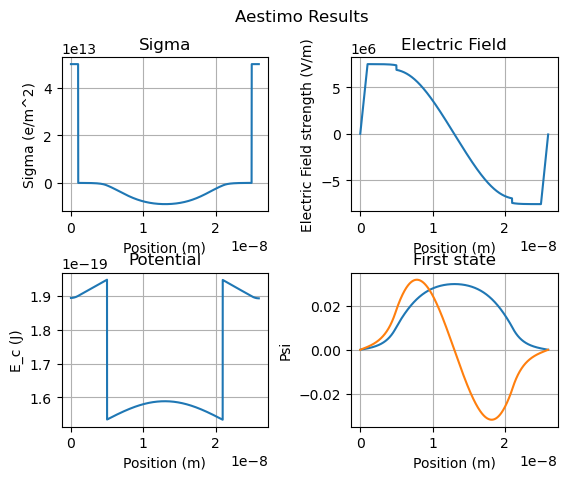

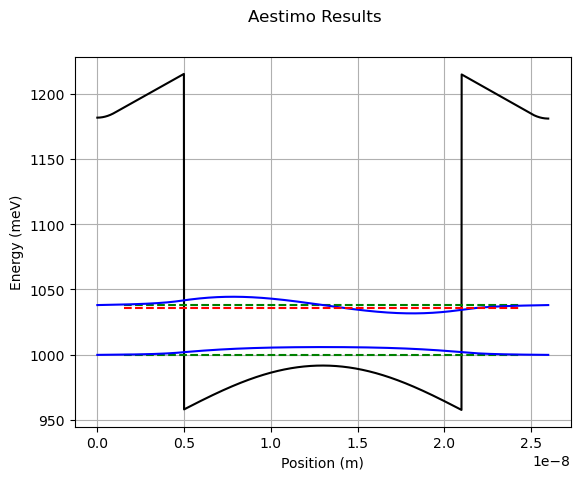

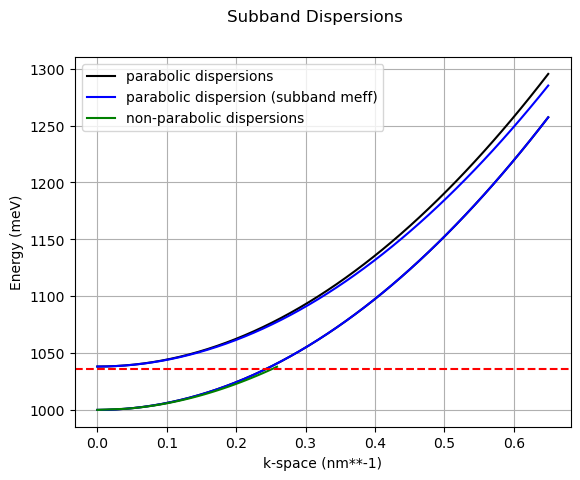

INFO Simulation is finished.


In [ ]:
import aestimo as solver
import database as adatabase
# Initialise structure class
structure = s
model = solver.StructureFrom(structure,adatabase) # structure could also be a dictionary.
    
#calculate QW states
result = solver.Poisson_Schrodinger(model)


# Write the simulation results in files
%matplotlib inline
solver.save_and_plot(result,model)
solver.logger.info("Simulation is finished.")

def set_well(d):
    """Sets barriers between the two QWs to d (nm)."""
    model.material[well_layer][0] = d
    model.create_structure_arrays() # update the instance's internals


results = []
barriers = np.arange(1,11)
for barrier in barriers:
    set_barrier(barrier)
    resulti = solver.Poisson_Schrodinger(model1)
    results.append(resulti.E_state)

results = np.array(results)

ax1 = plt.subplot(111)
for level in results.transpose(): ax1.plot(barriers,level)
ax1.invert_xaxis()
ax1.set_xlabel("barrier thickness (nm)")
ax1.set_ylabel("Energy (meV)")
plt.show()

state, Energy, Population, effective mass
     ,meV    , m**-2    , m_e**-1
    0  999.85       1e+16, 5.69e-32
    1 1038.02           0, 5.92e-32
state, Energy offset from GaAs CBM
     ,meV  
    0 42.1807
    1 80.3468


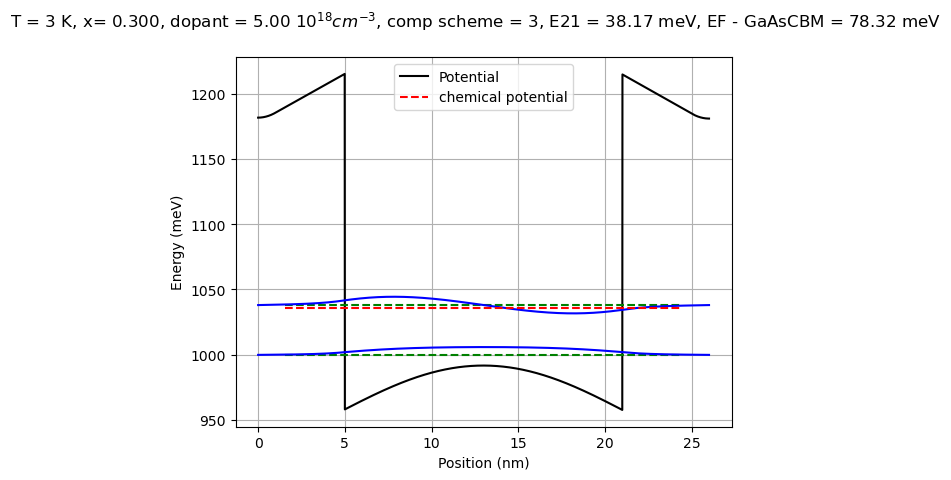

In [14]:
import numpy as np
pot_GaAs = np.min(result.fitot)/meV2J  # GaAs CBM
pot_AlGaAs = np.max(result.fitot)/meV2J  # AlGaAs CBM

print('state, Energy, Population, effective mass')
print('     ,meV    , m**-2    , m_e**-1')
for num,E,N,meff in zip(range(result.subnumber_e),result.E_state,result.N_state,result.meff_state):
    print('%5d %7g %11.3g, %7.3g' %(num,E,N,meff))

print('state, Energy offset from GaAs CBM')
print('     ,meV  ')
for num,E in zip(range(result.subnumber_e),result.E_state):
    print('%5d %7g' %(num,E-pot_GaAs))

E21 = result.E_state[1] - result.E_state[0]  # E21 is the energy difference between the first two states
EFCBM = result.E_F - pot_GaAs  # Fermi level with respect to GaAs CBM

fig_titled = plot_QW_view(result, r"T = %g K, x= %0.3f, dopant = %0.2f $10^{18} cm^{-3}$, comp scheme = %g, E21 = %0.2f meV, EF - GaAsCBM = %0.2f meV" % (s.T,x_frac,dopant/1e18,s.computation_scheme,E21,EFCBM))
